### Predict the percentage of marks of a student based on the study hours.
Prediction using supervised ML
### Linear Regression model

By Resmi Reghukumar

In [1]:
#importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading csv file
data=pd.read_csv("/home/resmi/Downloads/ML/The Spark Foundation/student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# checking for null values
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.shape

(25, 2)

In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

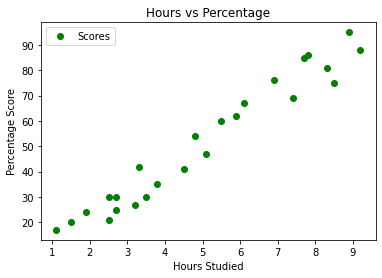

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores',style ='o',c='green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

## Data Preparation

In [8]:
y=data['Scores']
X=data.drop(['Scores'],axis=1)


In [9]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [10]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) 

In [12]:
X_train.shape

(17, 1)

In [13]:
X_test.shape

(8, 1)

## Training the model

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

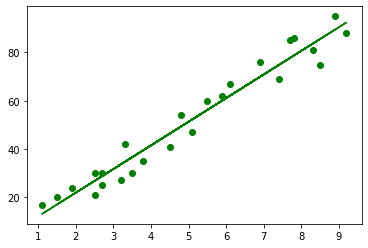

In [15]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,c='green')
plt.plot(X, line,c='green');
plt.show()

## Making Predictions

In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores


    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8


In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


In [18]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = 9.25
Predicted Score = [92.91505723]


## Evaluating the model

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027651
